In [1]:
import numpy as np
from scipy.stats import sem, t, norm
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 1. 
Perform Monte Carlo integration using R statistical programming or Python programming to estimate the value 
of π. To summarize the approach, consider the unit quarter circle illustrated in the figure below: 

Generate  𝑁 pairs  of  uniform  random  numbers (𝑥,𝑦),  where 𝑥~ 𝑈(0,1)  and 𝑦  ~ 𝑈(0,1),  and  each  (𝑥,𝑦)  pair 
represents a point in the unit square. To obtain an estimate of π, count the fraction of points that fall inside the unit quarter circle and multiply by 4. Note that the fraction of points that fall inside the quarter circle should tend to the ratio between the area of the unit quarter circle (i.e., ¼ 𝜋) as compared to area of the unit square (i.e., 1). We proceed step-by-step: 
 
__a)__ Create a function `insidecircle` that takes two inputs between 0 and 1 and returns 1 if these points fall within 
the unit circle.  

In [2]:
def insidecircle(x, y):
    if x < 0 or x > 1 or y < 0 or y > 1:
        raise Exception("Values for x and y must be between 0 and 1")
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

__b)__ Create a function `estimatepi` that takes a single input 𝑁, generates 𝑁 pairs of uniform random numbers and 
uses `insidecircle` to produce an estimate of 𝜋 as described above. In addition to the estimate of 𝜋, `estimatepi` 
should also return the standard error of this estimate, and a 95% confidence interval for the estimate. 

In [3]:
def estimatepi(N):
    total_true = 0
    results_list = []
    for i in range(N):
        a = np.random.uniform(low=0.0, high=1.0)
        b = np.random.uniform(low=0.0, high=1.0)
        result = insidecircle(a, b) 
        results_list.append(result)
        total_true += result
    
    ## pi= 4 * (number of points generated inside the circle) / (number of points generated inside the square)
    pi_est = 4 * total_true / N
    std_error = sem(results_list)
    
    #create 95% confidence interval for population mean weight
    lower_cutoff = pi_est + t.ppf(0.025, N - 1, scale = std_error)
    upper_cutoff = pi_est + t.ppf(0.975, N - 1, scale = std_error)  
    return pi_est, std_error, (lower_cutoff, upper_cutoff)

__c)__ Use `estimatepi` to estimate 𝜋 for 𝑁 = 1000 to 10000 in increments of 500 and record the estimate, its standard 
error  and  the  upper  and  lower  bounds  of  the  95%  CI.  How  large  must  𝑁  be  in  order  to  ensure  that  your estimate of 𝜋 is within 0.1 of the true value?  

In [4]:
#How large must 𝑁 be in order to ensure that your estimate of 𝜋 is within 0.1 of the true value?
for N in range(1000, 10500, 500):
    pi_est, std_error, confidence_interval = estimatepi(N)
    if abs(pi_est - math.pi) < 0.1:
        print(f"N = {N} provides enough estimates to get within 0.1 of the true value of pi, {math.pi}. \n This estimated pi at {pi_est}.")
        value_of_N_to_use = N
        break

N = 1000 provides enough estimates to get within 0.1 of the true value of pi, 3.141592653589793. 
 This estimated pi at 3.24.


__d)__ Using the value of 𝑁 you determined in part c), run estimatepi 500 times and collect 500 different estimates of 𝜋. Produce a histogram of the estimates and note the shape of this distribution. Calculate the standard deviation of the estimates – does it match the standard error you obtained in part c)? What percentage of the estimates lies within the 95% CI you obtained in part c)?

In [5]:
def multiple_pi_estimates(value_of_N_to_use):
    pi_estimates_list = []
    for i in range(500):
        pi_est, std_error, confidence_interval = estimatepi(value_of_N_to_use)
        pi_estimates_list.append(pi_est)
    std_dev = np.std(pi_estimates_list)
    return pi_estimates_list, std_dev

In [6]:
pi_estimates_list, std_dev = multiple_pi_estimates(value_of_N_to_use)

<AxesSubplot: ylabel='Count'>

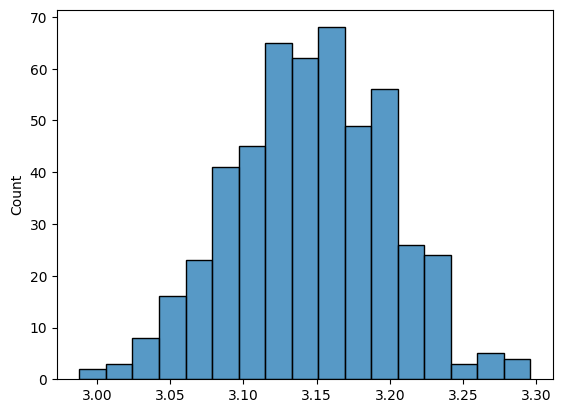

In [7]:
sns.histplot(data=pi_estimates_list)

In [8]:
within_ci = [True if i > confidence_interval[0] and i < confidence_interval[1] else False for i in pi_estimates_list]
percent_within_ci = sum(bool(x) for x in within_ci)/len(pi_estimates_list)

print(f"The standard error, {std_error}, does {'' if std_error == std_dev else 'not'} match the standard deviation, {std_dev}")
print(f"The percentage of the estimates that are within the 95% CI obtained in part c) is {percent_within_ci*100}%")


The standard error, 0.012411851354816254, does not match the standard deviation, 0.0527257046989417
The percentage of the estimates that are within the 95% CI obtained in part c) is 8.200000000000001%


## 2.  

A salesperson in a large bicycle shop is paid a bonus if he sells more than 4 bicycles a day.  The probability of 
selling more than 4 bicycles a day is only 0.40.  If the number of bicycles sold is greater than 4, the distribution of sales as shown below.  The shop has four different models of bicycles.  The amount of the bonus paid out varies by 
type.  The bonus for model A is \\$10; 40\% of the bicycles sold are of this type.  Model B accounts for 35\% of the 
sales and pays a bonus of \\$15.  Model C has a bonus rating of $20 and makes up 20\% of the sales.  Finally, a model 
D pays a bonus of \\$25 for each sale but accounts for only 5\% of the sales.  Develop a simulation model to calculate 
the bonus a salesperson can expect in a day. 
 

|Number of Bicycles Sold|  Probability |
|-----|-----|
|5  |   0.35 |
|6  |   0.45 |
|7  |   0.15 |
|8  |   0.05 |

In [9]:
def estimate_bicycles_sold():
    # Generates a random number between 0 and 1
    rand_num = np.random.random()
    
    # Probability table for selling different numbers of bicycles
    prob_table = {
        5: 0.35,
        6: 0.45,
        7: 0.15,
        8: 0.05
    }
    
    # If the random number is greater than .4, then the number of bicycles sold is 4 or less
    if rand_num > 0.4:
        return np.random.randint(1, 5)
    
    ## Function that loops through the probability table and subtracts each probability from the random number 
    ## until it finds the first number of bicycles sold for which the random number is less than or 
    ## equal to the probability
    for num_bicycles_sold, prob in prob_table.items():
        if rand_num <= prob:  ## checks to see if the randum number is less than a given value in the prob_table
            return num_bicycles_sold  ## returns the key from the table
        rand_num -= prob  # subtracts the probability from the random number
    
    # If the loop completes without returning a value, return the maximum number of bicycles sold (8)
    return 8


In [10]:
def calculate_bonus():
    # If the number of bicycles sold is less than or equal to 4, there's no bonus
    num_bicycles_sold = estimate_bicycles_sold()
    if num_bicycles_sold <= 4:
        total_bonus = 0
    
    bike_list = ["A", "B", "C", "D"]
    
    # Sales distribution for different models of bicycles
    sales_distribution = {"A": 0.4, 
                          "B": 0.35, 
                          "C": 0.2, 
                          "D": 0.05}
    
    # Bonus for each model of bicycles
    bonus_rate = {"A": 10, 
                  "B": 15, 
                  "C": 20, 
                  "D": 25}
    
    # Calculate the number of bicycles sold for each model
    num_bicycles_sold_per_model = np.random.multinomial(num_bicycles_sold, list(sales_distribution.values()))
    num_bicycles_sold_per_model_dict = dict(zip(bike_list, list(num_bicycles_sold_per_model)))
    
    # Calculate the bonus for each model of bicycles
    bonus_per_model = [num_bicycles_sold_per_model_dict[model] * bonus_rate[model] for model in bike_list]
    
    # Total bonus for the day
    total_bonus = sum(bonus_per_model)
    
    return num_bicycles_sold_per_model_dict, num_bicycles_sold, total_bonus


In [11]:
## Calculate the bonus over the course of N days:
def long_term(days):
    bonus_list = []
    for day in range(days):
        num_bicycles_sold_per_model_dict, num_bicycles_sold, total_bonus = calculate_bonus()
        bonus_list.append(total_bonus)
    return bonus_list

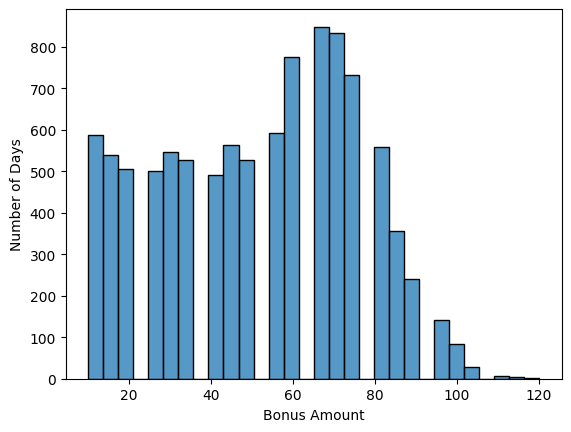

In [12]:
bonus_list = long_term(10000)
ax = sns.histplot(data=bonus_list)
ax.set(xlabel='Bonus Amount', ylabel='Number of Days')
plt.show()

## 3.  

Michael is 24 years old and has a 401(k) plan through his employer, a large financial institution.  His company 
matches 50\% of his contributions up to 6\% of his salary.  He currently contributes the maximum amount he can 
(i.e., 6\%).  

In his 401(k), he has three funds.  Investment A is a large-cap index fund, which has had an average 
annual growth over the past 10 years of 6.63\% with a standard deviation of 13.46\%.  Investment B is a mid-cap 
index fund with a 10-year average annual growth of 9.89\% and a standard deviation of 15.28\%.  Finally, 
Investment C is a small-cap Index fund with a 10-year average annual growth rate of 8.55\% and a standard 
deviation of 16.90\%.  Fifty percent of his contribution is directed to Investment A, 25\% to Investment B, and 25\% 
to Investment C.  

His current salary is \\$48,000 and based on a compensation survey of financial institutions, he 
expects an average raise of 2.7\% with a standard deviation of 0.4\% each year.  Develop a simulation model to 
predict his 401(k) balance at age 60. 
 

In [13]:
age = 24
retirement_age = 60
salary = 48000
average_raise = 2.7/100
std_dev_of_raise = 0.4/100
contribution_rate = 0.06
company_match_rate = 0.5

In [14]:
"""
Simulates the growth of a 401k over time. 

In his 401(k), he has three funds, A, B, and C

Investment A is a large-cap index fund, which has had an average annual growth over the past 10 years of 
6.63% with a standard deviation of 13.46%. 

Investment B is a mid-cap index fund with a 10-year average annual growth of 
9.89% and a standard deviation of 15.28%. 

Finally, Investment C is a small-cap Index fund with a 10-year average annual growth rate of 
8.55% and a standard deviation of 16.90%. 

Fifty percent of his contribution is directed to Investment A, 25% to Investment B, and 25% to Investment C.
"""

fund_rates = {
    "A": {"mean": 6.63/100, # annual growth rate 6.63%
          "std_dev": 13.46/100, # standard deviation 13.46%
          "contribution_percent": .5}, # percent contribution 50%
    "B": {"mean": 9.89/100,
          "std_dev": 15.28/100,
          "contribution_percent": .25},
    "C": {"mean": 8.55/100,
          "std_dev": 16.9/100,
          "contribution_percent": .25},
}

In [15]:
def salary_over_time(salary, average_raise, std_dev_of_raise, current_age, retirement_age):
    """
    Simulates Michael's salary growth over time. 
    This function takes into account the expected average annual raise 
    and the standard deviation of raises.
    """
    num_of_years = retirement_age - current_age
    year_list = [0]
    salary_list = [salary]
    for year in range(num_of_years):
        year_list.append(year+1)
        
        # Generate random raise amount based on average and standard deviation
        raise_amount = np.random.normal(average_raise, std_dev_of_raise)
        
        # Calculate the new salary based on the previous year's salary and append it to a list
        salary_list.append(salary_list[-1] * (1 + raise_amount))
    
    return dict(zip(year_list, salary_list))

In [16]:
def balance_over_time(salary, average_raise, std_dev_of_raise, current_age, retirement_age, fund_rates,
                     contribution_rate, company_match):
    """
    Simulates the growth of a 401k over time. 
    
    Inputs are a salary dict (calculated with "salary_over_time") and a fund rates dictionary, such as in the format
    that follows:
        fund_rates = {
            "A": {"mean": 6.63/100,  # annual growth rate
                  "std_dev": 13.46/100, # standard deviation
                  "contribution": .5}, # percent contribution
            "B": {"mean": 9.89/100,
                  "std_dev": 15.28/100,
                  "contribution": .25},
            "C": {"mean": 8.55/100,
                  "std_dev": 16.9/100,
                  "contribution": .25},
        }
    """
    balance = 0
    yoy_account_value = []
    year_list = []
    salary_list = []
    total_amount_contributed_list = []
    dollars_contributed = []
    
    salary_dict = salary_over_time(salary, average_raise, std_dev_of_raise, current_age, retirement_age)
        
    # Generate random annual growth amount based on the average and standard deviation for each of the funds over time
    for year, salary in salary_dict.items():
        year_list.append(year)
        salary_list.append(salary)
        emp_and_company_contribution_amount = (salary * contribution_rate) + (salary * (contribution_rate * company_match))
        dollars_contributed.append(emp_and_company_contribution_amount)
        
        yearly_contribution_total = 0
        # iterate through each fund
        for k, v in fund_rates.items():
            fund_growth_estimate = 1 + np.random.normal(v['mean'], v['std_dev']) # estimate the fund's growth
            
            # calculate the amount to add to the account from that fund, based on contribution percentage
            account_growth = (emp_and_company_contribution_amount * 
                              fund_rates[k]['contribution_percent']) * fund_growth_estimate
            #print(f"Fund: {k}; Growth Estimate: {fund_growth_estimate}; Amount from Fund: {account_growth}")
            
            # Add that fund's "contribution" to the account for the year
            yearly_contribution_total += account_growth
        
        # add the amount from all three funds to the account for the year
        balance += yearly_contribution_total 
        yoy_account_value.append(balance)
    
    yearly_picture = {
        "year": year_list,
        "salary": salary_list,
        "dollars_contributed": dollars_contributed,
        "account_balance_at_end_of_year": yoy_account_value
    }
    
    return balance, pd.DataFrame(yearly_picture)
    

In [17]:
def sim_401k_many_times(N):
    balance_list = []
    dataframe_list = []
    for day in range(N):
        balance, yearly_state_of_account = balance_over_time(salary, 
                                                             average_raise, 
                                                             std_dev_of_raise, 
                                                             age, 
                                                             retirement_age, 
                                                             fund_rates,
                                                             contribution_rate, 
                                                             company_match_rate)
        balance_list.append(balance)
        dataframe_list.append(yearly_state_of_account)
    return balance_list, dataframe_list

The average estimated balance based on 10000 simulations is $290,111.29


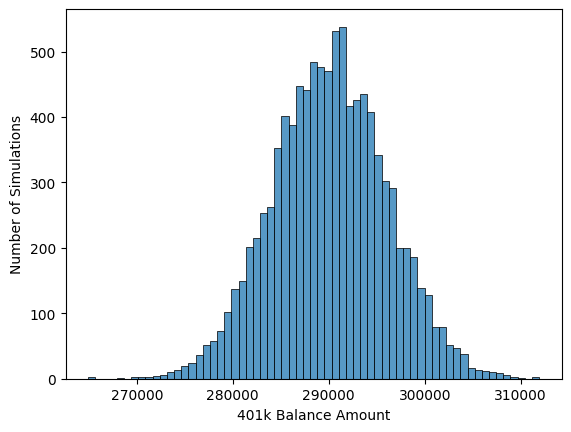

In [18]:
number_of_sims = 10000
balance_list, dataframe_list = sim_401k_many_times(number_of_sims)
mu, std = norm.fit(balance_list)
print(f'The average estimated balance based on {number_of_sims} simulations is ${mu:,.2f}')

ax = sns.histplot(data=balance_list)
ax.set(xlabel='401k Balance Amount', ylabel='Number of Simulations')
plt.show()